In [395]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [396]:
from ast import literal_eval
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import sparse as sp_sparse
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [498]:
from sklearn.model_selection import train_test_split
data = pd.read_csv('/content/gdrive/My Drive/project/50000.csv',encoding='ISO-8859-1')
# data['tags'] = data['tags'].apply(literal_eval)
# x = data.nutrition
x = data.drop(["name","id","contributor_id","nutrition","submitted","steps","tags","description","ingredients"],axis = 1)
y = data['easy']


In [499]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert each category in the label to an integer
# le = LabelEncoder()
# y= le.fit_transform(y)
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=1/5,random_state=0)

In [500]:
print(y)
print(y.shape)

0        1
1        0
2        0
3        1
4        1
        ..
49995    1
49996    1
49997    0
49998    1
49999    1
Name: easy, Length: 50000, dtype: int64
(50000,)


In [501]:
print(y_train)

20330    0
17532    1
45819    1
34807    1
31888    1
        ..
21243    1
45891    1
42613    1
43567    1
2732     1
Name: easy, Length: 40000, dtype: int64


In [502]:
print(X_train)

       minutes  healthy  ...  stated_fat  total_carbonhydrate
20330       70        0  ...          29                    6
17532       60        1  ...           6                   13
45819       50        0  ...           0                    5
34807      130        1  ...           0                    5
31888       25        0  ...          12                    3
...        ...      ...  ...         ...                  ...
21243       10        1  ...          29                    9
45891       10        0  ...           0                    1
42613       20        0  ...           0                    0
43567        1        0  ...           0                    1
2732        20        0  ...          58                   18

[40000 rows x 19 columns]


 **K-NN**

In [503]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,21): # Declare an of the KNN classifier class with the value with neighbors.

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train) # Fit the model with training data and target values
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [504]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [505]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 88.56 % and k = [19]


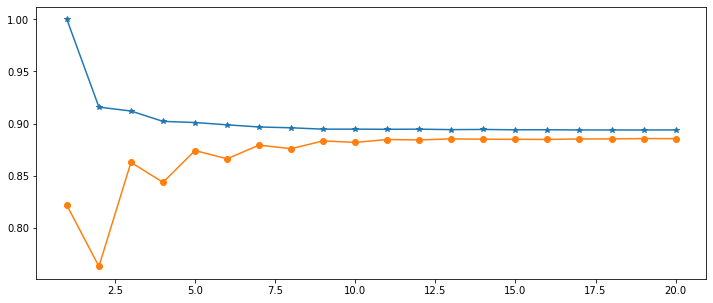

In [506]:
plt.figure(figsize=(12,5))
plt.plot(range(1,21),train_scores,marker='*',label='Train Score')
plt.plot(range(1,21),test_scores,marker='o',label='Test Score')

In [508]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(19)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.8856

In [509]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
#confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1,1141,1142
1,3,8855,8858
All,4,9996,10000


In [510]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.25      0.00      0.00      1142
           1       0.89      1.00      0.94      8858

    accuracy                           0.89     10000
   macro avg       0.57      0.50      0.47     10000
weighted avg       0.81      0.89      0.83     10000



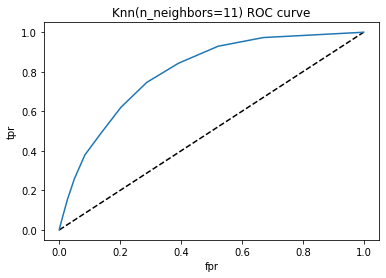

In [461]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [511]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.5412341599844046

In [512]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,25)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.8938
Best Parameters: {'n_neighbors': 23}


**NAIVE** **BAYES**

In [513]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix


In [514]:
# Initiating the Gaussian Classifier
mod = GaussianNB()

# Training your model 
mod.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [515]:
# Predicting Outcome 
predicted = mod.predict(X_test)

In [516]:
mod.score(X_test,y_test)

0.9987

In [517]:
# Confusion Matrix
y_pred = mod.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[1135    7]
 [   6 8852]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1142
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Decision Tree**

In [518]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=3, max_features=10, random_state=0)
dt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [519]:
y_pred = dt.predict(X_test)

In [520]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[1142    0]
 [   0 8858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**NN**

In [521]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [522]:
from sklearn.neural_network import MLPClassifier  
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train)  

Iteration 1, loss = 0.56141533
Iteration 2, loss = 0.06175083
Iteration 3, loss = 0.01474975
Iteration 4, loss = 0.00620460
Iteration 5, loss = 0.00325211
Iteration 6, loss = 0.00186231
Iteration 7, loss = 0.00122542
Iteration 8, loss = 0.00085055
Iteration 9, loss = 0.00062777
Iteration 10, loss = 0.00048018
Iteration 11, loss = 0.00037744
Iteration 12, loss = 0.00030293
Iteration 13, loss = 0.00024721
Iteration 14, loss = 0.00020501
Iteration 15, loss = 0.00017189
Iteration 16, loss = 0.00014577
Iteration 17, loss = 0.00012476
Iteration 18, loss = 0.00010780
Iteration 19, loss = 0.00009375
Iteration 20, loss = 0.00008196
Iteration 21, loss = 0.00007223
Iteration 22, loss = 0.00006392
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(10, 10), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=2, warm_start=False)

In [523]:
predictions = mlp.predict(X_test)

from sklearn import metrics 
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))  

Accuracy 1.0
[[1142    0]
 [   0 8858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [524]:
print("Accuracy on training set: {:.3f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 1.000


In [525]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib 
import pandas as pd
import numpy as np

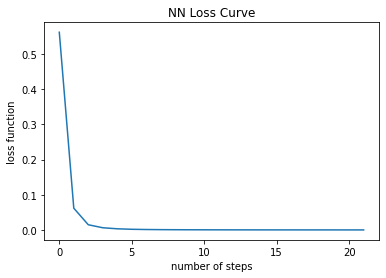

In [526]:
plt.plot(mlp.loss_curve_)
plt.title("NN Loss Curve")
plt.xlabel("number of steps")
plt.ylabel("loss function")
plt.show()

In [527]:
(mlp.intercepts_[0]).shape

(10,)

In [528]:
(mlp.coefs_[0]).shape

(19, 10)

In [529]:
mlp.intercepts_[0]

array([ 0.284172  ,  0.25674462, -0.15967522, -0.17549686,  0.24376173,
        0.20495787, -0.52660715,  0.50787228,  0.1919618 ,  0.54665074])

In [530]:
mlp.coefs_[0]

array([[ 2.47656512e-01, -6.84225892e-02,  1.38157840e-01,
         3.94005803e-01,  3.36770185e-01,  2.76570082e-01,
         4.99255970e-02,  7.86993522e-02,  2.80186635e-01,
        -6.04377098e-01],
       [-4.82790847e-04,  7.79352252e-01,  3.32521649e-01,
         1.16278654e-01, -7.69828884e-01,  9.85205701e-02,
        -2.73166391e-01, -2.83476888e-01,  6.97027251e-02,
        -5.68988234e-01],
       [ 1.20051837e-01,  7.15460972e-01, -2.38067671e-01,
         1.09895889e-01, -4.33666953e-01,  9.09374607e-03,
         1.63544888e-01, -7.94467284e-01, -3.38139510e-01,
        -2.02917447e-01],
       [-3.61140989e-01, -1.17713075e-01,  1.17193656e-01,
        -2.81934753e-01, -1.78757825e-01,  8.99098205e-01,
         9.75742846e-02, -6.27294020e-01, -6.84268743e-01,
        -3.70020166e-01],
       [ 1.80562031e-01,  6.31976249e-01,  9.82960184e-02,
         8.42357158e-02, -3.40882724e-02,  4.99885284e-01,
        -2.54867019e-03, -6.29711025e-01, -4.71766255e-01,
         1.

In [531]:
#Adjust the number of hidde Layer/ hidden node to improve the NN performance. Write your code below.

mlp = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=1000,verbose=2)  
mlp.fit(X_train, y_train) 

predictions = mlp.predict(X_test)  

Iteration 1, loss = 0.38551887
Iteration 2, loss = 0.12391017
Iteration 3, loss = inf
Iteration 4, loss = inf
Iteration 5, loss = inf
Iteration 6, loss = inf
Iteration 7, loss = inf
Iteration 8, loss = 0.00396868
Iteration 9, loss = 0.00313057
Iteration 10, loss = 0.00256087
Iteration 11, loss = 0.00214670
Iteration 12, loss = 0.00181588
Iteration 13, loss = 0.00152825
Iteration 14, loss = 0.00130507
Iteration 15, loss = 0.00108220
Iteration 16, loss = 0.00089035
Iteration 17, loss = 0.00073132
Iteration 18, loss = 0.00059982
Iteration 19, loss = 0.00046495
Iteration 20, loss = 0.00033404
Iteration 21, loss = 0.00027810
Iteration 22, loss = 0.00025452
Iteration 23, loss = 0.00023039
Iteration 24, loss = 0.00020807
Iteration 25, loss = 0.00019796
Iteration 26, loss = 0.00019078
Iteration 27, loss = 0.00016651
Iteration 28, loss = 0.00014460
Iteration 29, loss = 0.00013439
Iteration 30, loss = 0.00012629
Iteration 31, loss = 0.00011840
Training loss did not improve more than tol=0.000100

In [532]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
print("Accuracy", metrics.accuracy_score(y_test, predictions))
print(confusion_matrix(y_test,predictions))  
print(classification_report(y_test,predictions))

Accuracy 1.0
[[1142    0]
 [   0 8858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



**Logistic** **Regression**

In [533]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=0.01, max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 1.000
Test set score: 1.000


In [534]:
logreg.intercept_.T

array([5.37542088])

In [535]:
logreg.coef_.T

array([[-2.39241776e-03],
       [ 9.30550896e-04],
       [ 2.20598674e-02],
       [ 1.54908935e-02],
       [-4.50854833e-03],
       [ 1.54106552e-02],
       [ 1.33042534e-02],
       [ 2.70557030e+00],
       [ 6.78170586e-01],
       [ 4.79090160e-02],
       [-1.83485847e-01],
       [-2.79953255e-01],
       [-8.18638788e-04],
       [ 9.23028440e-03],
       [ 7.66395531e-04],
       [ 1.10305828e-03],
       [-1.19271574e-02],
       [-1.64115178e-02],
       [-2.76832420e-03]])

In [536]:
print(y_test)

11841    1
19602    1
45519    1
25747    1
42642    1
        ..
25091    1
27853    1
47278    1
37020    1
2217     1
Name: easy, Length: 10000, dtype: int64


In [537]:
from sklearn.metrics import classification_report, confusion_matrix  
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
##before processing data in PCA, we got 0.73 accurancy, from this we can observe the accurancy do not decrease a lot
#we can also normally use the model, and largely reduce caculation by using PCA

[[1142    0]
 [   0 8858]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1142
           1       1.00      1.00      1.00      8858

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



In [538]:
#!conda install -c conda-forge scikit-plot
import matplotlib.pyplot as plt
import scikitplot as skplt
y_pred_probas = logreg.predict_proba(X_test)

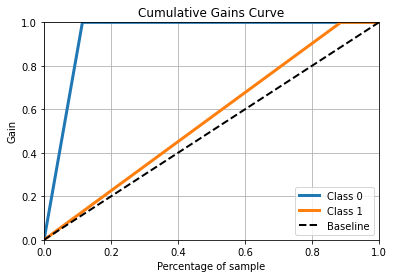

In [539]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_probas)
plt.show()

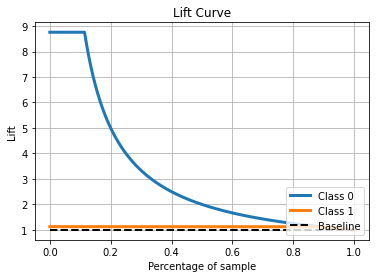

In [540]:
skplt.metrics.plot_lift_curve(y_test, y_pred_probas)
plt.show()